In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from matplotlib import cm, colors
from matplotlib.ticker import AutoMinorLocator


# define a sample correlation matrix
# mat = np.random.uniform(-1, 1, (7, 7))
# mat = mat * (1-np.diag([1 for i in range(7)]))

# open model file
with open('ResNet4_bestmodel.pkl', 'rb') as f:
    [model, config, model_stat] = pickle.load(f)
model_stat['residual_matrix']

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


[              auto  bike  transit  walk  auto+transit  other_mode  other_combi
 auto         -0.30  0.30     0.40 -0.54          0.70        0.50         0.50
 bike          0.32  0.42    -0.27 -0.27         -0.25       -0.14         0.00
 transit       1.14  0.25     0.03  1.22          0.05       -0.09        -0.15
 walk          0.42  0.34    -0.55  2.09          0.59       -0.23        -0.19
 auto+transit  0.26 -0.31     0.44 -0.03          0.29       -1.02        -0.73
 other_mode    1.36  0.25    -0.15  0.66          0.59        0.29        -0.55
 other_combi   0.00  0.00     0.00  0.00          0.00        0.00         1.00,
               auto  bike  transit  walk  auto+transit  other_mode  other_combi
 auto          0.07  0.94     0.14 -0.06          0.60        0.29         0.73
 bike         -0.22  2.84    -1.51  0.94         -1.23       -0.46        -0.73
 transit       0.68  0.37     1.20  2.24         -0.24        0.16         1.17
 walk          0.65 -0.06     0.71  1.8

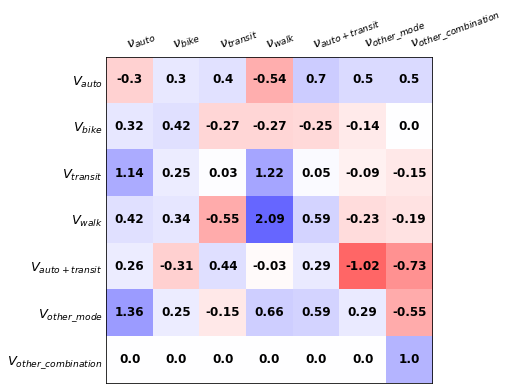

In [2]:
mat = model_stat['residual_matrix'][0]

# define a list of choices
choices = ['auto', 'bike', 'transit', 'walk', 'auto+transit', 'other_mode', 'other_combi']
choice_c= [r'$V_{auto}$', r'$V_{bike}$', r'$V_{transit}$', r'$V_{walk}$', r'$V_{auto+transit}$', r'$V_{other\_mode}$', r'$V_{other\_combination}$']
choice_m= [r'$\nu_{auto}$', r'$\nu_{bike}$', r'$\nu_{transit}$', r'$\nu_{walk}$', r'$\nu_{auto+transit}$', r'$\nu_{other\_mode}$', r'$\nu_{other\_combination}$']
# create a pandas correlation matrix table
df = pd.DataFrame(data=mat, index=choices, columns=choices)
df_normed = (df - df.mean()) / (df.max() - df.min())


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels(['']+choice_m, size=13, rotation='20', va='bottom', ha="left", rotation_mode="anchor")
ax.set_yticklabels(['']+choice_c, size=13)

colormap = cm.get_cmap('bwr_r')
from matplotlib.colors import DivergingNorm
ax.matshow(df, alpha=0.6, cmap=colormap, norm=DivergingNorm(0))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.grid(which='minor', ls=' ')
# plt.box(on=None)

# Add the text
x_start, x_end = 0, 7
y_start, y_end = 0, 7
x_skip = (x_end - x_start) / len(choices)
y_skip = (y_end - y_start) / len(choices)
x_positions = np.linspace(start=x_start-1, stop=x_end-1, num=len(choices), endpoint=False)
y_positions = np.linspace(start=y_start-1, stop=y_end-1, num=len(choices), endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = df.iloc[y_index, x_index].round(2)
        text_x = x + x_skip
        text_y = y + y_skip
        ax.text(text_x, text_y, label, color='black', ha='center', va='center', weight='bold', size=12)
        


In [34]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rc('text', usetex=True)

def get_corr_visu(mat, index, choice_c, choice_m, norm, figsize=(8, 8), title=''):
    '''
    Parameters
    ----------
    Args:
        mat(pandas.DataFrame): correlation matrix
    '''
    assert type(mat) == pd.core.frame.DataFrame
    assert len(mat) == len(mat.columns)
    
    choices = ['auto', 'bike', 'transit', 'walk', 'auto+transit', 'other_mode', 'other_combi']
    
    
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels(['']+choice_m, size=13, rotation='20', va='bottom', ha="left", rotation_mode="anchor")
    ax.set_yticklabels(['']+choice_c, size=13)
    ax.text(3, 7, title, ha='center', va='bottom', size=12)
    
    # define a colormap
    colormap = cm.get_cmap('bwr_r')
    
    ax.matshow(mat, alpha=0.6, cmap=colormap, norm=norm)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    plt.grid(which='minor', ls=' ')
    
    # Add the text
    size = len(choices)
    start, end = 0, size
    skip = (end - start) / size
    x_pos = np.linspace(start=start-1, stop=end-1, num=size, endpoint=False)
    y_pos = np.linspace(start=start-1, stop=end-1, num=size, endpoint=False)
    
    for y_idx, y in enumerate(y_pos):
        for x_idx, x in enumerate(x_pos):
            label = mat.iloc[y_idx, x_idx].round(2)
            ax.text(x + skip, y + skip, label, color='black', ha='center', va='center', weight='bold', size=11)
    plt.tight_layout()
    fig.savefig('images/index'+str(index)+'.pdf', format='pdf') 

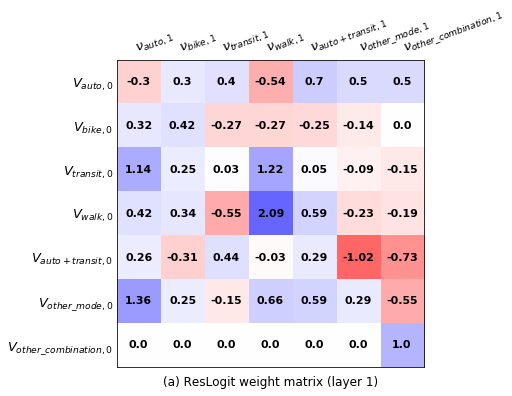

In [40]:
get_corr_visu(
    model_stat['residual_matrix'][0], 
    index=1,
    choice_c=[r'$V_{auto,0}$', r'$V_{bike,0}$', r'$V_{transit,0}$', r'$V_{walk,0}$', r'$V_{auto+transit,0}$', r'$V_{other\_mode,0}$', r'$V_{other\_combination,0}$'],
    choice_m=[r'$\nu_{auto,1}$', r'$\nu_{bike,1}$', r'$\nu_{transit,1}$', r'$\nu_{walk,1}$', r'$\nu_{auto+transit,1}$', r'$\nu_{other\_mode,1}$', r'$\nu_{other\_combination,1}$'],
    norm=mpl.colors.DivergingNorm(0),
    title='(a) ResLogit weight matrix (layer 1)')

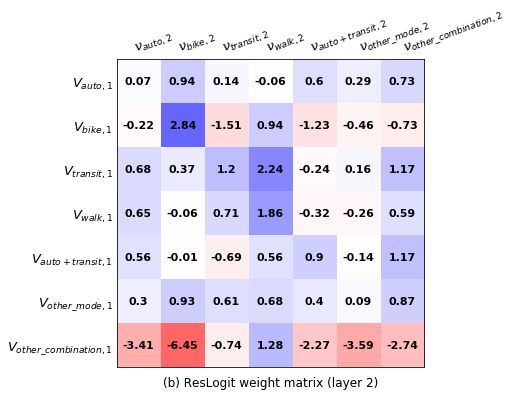

In [41]:
get_corr_visu(
    model_stat['residual_matrix'][1], 
    index=2,
    choice_c=[r'$V_{auto,1}$', r'$V_{bike,1}$', r'$V_{transit,1}$', r'$V_{walk,1}$', r'$V_{auto+transit,1}$', r'$V_{other\_mode,1}$', r'$V_{other\_combination,1}$'],
    choice_m=[r'$\nu_{auto,2}$', r'$\nu_{bike,2}$', r'$\nu_{transit,2}$', r'$\nu_{walk,2}$', r'$\nu_{auto+transit,2}$', r'$\nu_{other\_mode,2}$', r'$\nu_{other\_combination,2}$'],
    norm=mpl.colors.DivergingNorm(0),
    title='(b) ResLogit weight matrix (layer 2)')

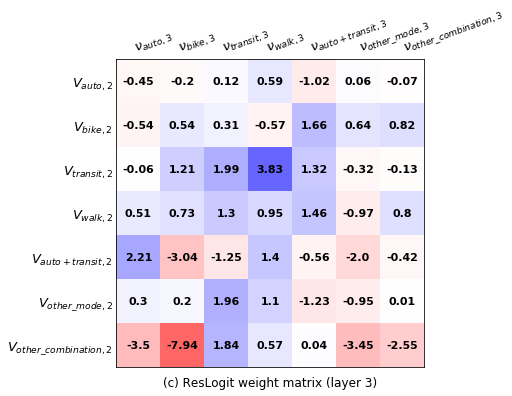

In [42]:
get_corr_visu(
    model_stat['residual_matrix'][2],
    index=3,
    choice_c=[r'$V_{auto,2}$', r'$V_{bike,2}$', r'$V_{transit,2}$', r'$V_{walk,2}$', r'$V_{auto+transit,2}$', r'$V_{other\_mode,2}$', r'$V_{other\_combination,2}$'],
    choice_m=[r'$\nu_{auto,3}$', r'$\nu_{bike,3}$', r'$\nu_{transit,3}$', r'$\nu_{walk,3}$', r'$\nu_{auto+transit,3}$', r'$\nu_{other\_mode,3}$', r'$\nu_{other\_combination,3}$'],
    norm=mpl.colors.DivergingNorm(0),
    title='(c) ResLogit weight matrix (layer 3)')

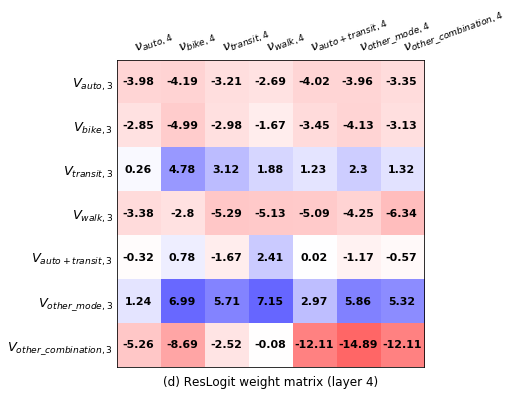

In [43]:
get_corr_visu(
    model_stat['residual_matrix'][3], 
    index=4,
    choice_c=[r'$V_{auto,3}$', r'$V_{bike,3}$', r'$V_{transit,3}$', r'$V_{walk,3}$', r'$V_{auto+transit,3}$', r'$V_{other\_mode,3}$', r'$V_{other\_combination,3}$'],
    choice_m=[r'$\nu_{auto,4}$', r'$\nu_{bike,4}$', r'$\nu_{transit,4}$', r'$\nu_{walk,4}$', r'$\nu_{auto+transit,4}$', r'$\nu_{other\_mode,4}$', r'$\nu_{other\_combination,4}$'],
    norm=mpl.colors.DivergingNorm(0),
    title='(d) ResLogit weight matrix (layer 4)')